In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

Loading the Dataset

In [50]:
dataset= pd.read_csv('dataset.csv')

In [51]:
dataset.head(5)

,Unnamed: 0,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%),Shift,Energy_Efficiency,Hour,Humidity_Category,Humidity_Category_Encoded
0,0,222.483571,4.642510,965.023943,0.880626,21.734855,45.494834,Night,849.825214,0,Low,0
1,1,219.308678,4.206038,894.158159,0.939144,20.011891,46.477508,Night,839.743684,0,Low,0
2,2,223.238443,4.143615,1102.598216,0.864156,17.952615,64.195316,Night,952.816878,0,High,2
3,3,227.615149,4.188552,1006.917263,0.926711,19.613098,37.214868,Night,933.121159,0,Low,0
4,4,219.992912,5.165739,1081.262142,0.931754,21.783244,55.741660,Night,1007.470516,0,Medium,1


In [52]:
print(dataset.isnull().sum())

Unnamed: 0                   0
Voltage (V)                  0
Current (I)                  0
Power (W)                    0
Power_Factor                 0
Temperature (°C)             0
Humidity (%)                 0
Shift                        0
Energy_Efficiency            0
Hour                         0
Humidity_Category            0
Humidity_Category_Encoded    0
dtype: int64


Feature Preparation :

In [53]:
target_variable=dataset['Power (W)']
predictor_features= ['Voltage (V)','Current (I)','Temperature (°C)','Humidity (%)','Power_Factor']
X=dataset[predictor_features] #features
y=target_variable
X.head(5)

,Voltage (V),Current (I),Temperature (°C),Humidity (%),Power_Factor
0,222.483571,4.642510,21.734855,45.494834,0.880626
1,219.308678,4.206038,20.011891,46.477508,0.939144
2,223.238443,4.143615,17.952615,64.195316,0.864156
3,227.615149,4.188552,19.613098,37.214868,0.926711
4,219.992912,5.165739,21.783244,55.741660,0.931754


Train-Test Split :

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("Train-Test Split:")
print(f"Training Set Size (Features): {X_train.shape}")
print(f"Training Set Size (Target): {y_train.shape}")
print(f"Test Set Size (Features): {X_test.shape}")
print(f"Test Set Size (Target): {y_test.shape}")

Train-Test Split:
Training Set Size (Features): (8000, 5)
Training Set Size (Target): (8000,)
Test Set Size (Features): (2000, 5)
Test Set Size (Target): (2000,)


Training the Linear Regression Model: 

In [55]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [56]:
print("\nLinear Regression Coefficients:")
for feature, coef in zip(predictor_features, linear_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {linear_model.intercept_:.4f}")


Linear Regression Coefficients:
Voltage (V): 4.6211
Current (I): 210.3331
Temperature (°C): -0.0320
Humidity (%): 0.1411
Power_Factor: 19.2315
Intercept: -992.8050


Training the Random Forest Regression Model: 

In [57]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Model Evaluation:

In [58]:
y_pred_lr = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Linear Regression - Mean Absolute Error (MAE): {lr_mae:.4f}")
print(f"Linear Regression - Mean Squared Error (MSE): {lr_mse:.4f}")
print(f"Linear Regression - R² Score: {lr_r2:.4f}")
print(f"Random Forest - Mean Absolute Error (MAE): {rf_mae:.4f}")
print(f"Random Forest - Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Random Forest - R² Score: {rf_r2:.4f}")

Linear Regression - Mean Absolute Error (MAE): 58.9780
Linear Regression - Mean Squared Error (MSE): 4948.6574
Linear Regression - R² Score: 0.7510
Random Forest - Mean Absolute Error (MAE): 61.2788
Random Forest - Mean Squared Error (MSE): 5426.0935
Random Forest - R² Score: 0.7270


The Linear Regression model outperformed the Random Forest regressor as seen in the above data LR have less MAE and MSE while an higher R² Score then RF.This indicates that the relationship between predictors and energy consumption is predominantly linear, making Linear Regression a suitable and efficient choice.

Data Visualization:

Visualizing Linear Regression Model...


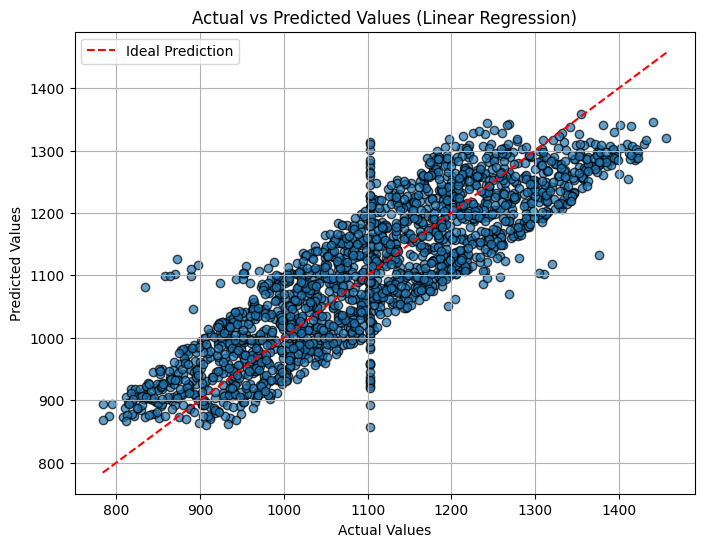

Visualizing Random Forest Regressor...


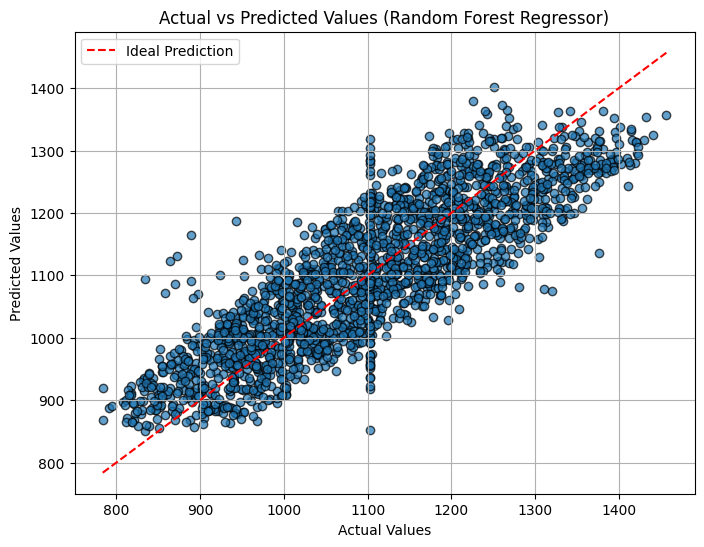

In [59]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
    plt.title(f"Actual vs Predicted Values ({model_name})")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.grid(True)
    plt.show()
print("Visualizing Linear Regression Model...")
plot_actual_vs_predicted(y_test, y_pred_lr, "Linear Regression")
print("Visualizing Random Forest Regressor...")
plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest Regressor")

Visualizing Linear Regression Model...


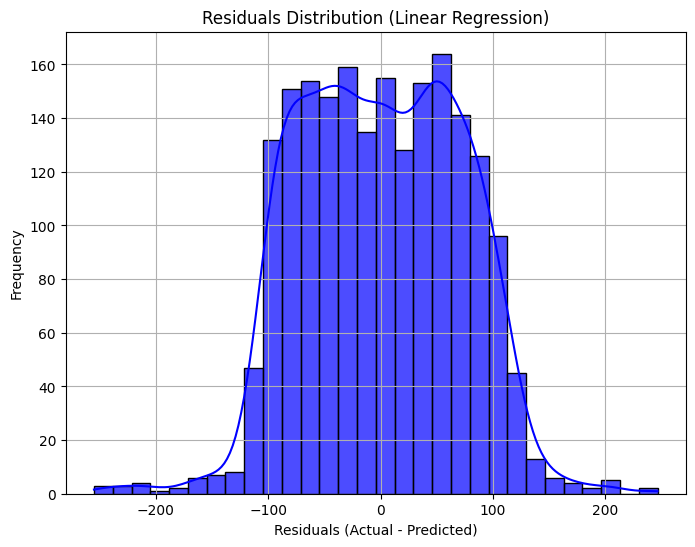

Visualizing Random Forest Regressor...


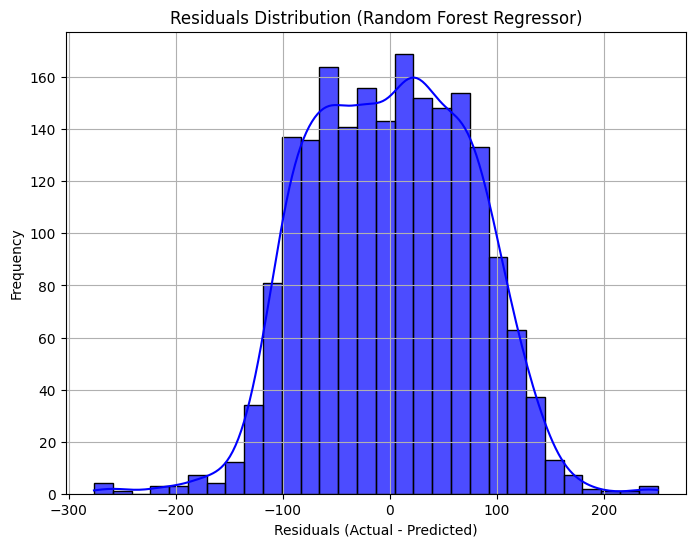

In [60]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f"Residuals Distribution ({model_name})")
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
print("Visualizing Linear Regression Model...")
plot_residuals(y_test, y_pred_lr, "Linear Regression")
print("Visualizing Random Forest Regressor...")
plot_residuals(y_test, y_pred_rf, "Random Forest Regressor")